# Notebook will cover K-NN Classification and Regression
## This is a working notebook meant to demonstrate ideas and play with concepts.

## Simple KNN Regression
### 1st Exercise:
- simulate (x,y) data
- plot with matplotlib
- make grid on x axis
- calculate average y-value of k nearest datapoint. (as judged by x-axis)
- vary k. see how k choice affects line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.stats as stats
from collections import Counter
import pandas as pd
import math as math

In [17]:
def myPoly(x_parm, second_set):
    return (x_parm**2 + second_set)


In [3]:
def my_norm_rvs(sample_size = 100):
    '''generate data to create x and y coordinates in the generate_my_simple_xy_coordinates'''
    first_x_set = stats.norm.rvs(loc = 0, scale = 5,size = sample_size)
    second_set = stats.norm.rvs(loc=5, scale=10, size=sample_size)
    return (first_x_set, second_set)

In [52]:
def my_sin_rvs(sample_size = 100):
    '''generate data that follows along a sin function with variation along the line.
    accept and return the same parameters as my_norm_rvs() method so they can be interchanged later. '''

    new_x = stats.uniform.rvs(size=sample_size, scale=20)
    x_sin = np.sin(new_x)

    new_y = []
    for my_sin in x_sin:
        #get y vals 
        new_y.append(stats.norm.rvs(loc =my_sin , scale = .4, size = 1))

#     plt.scatter(new_x, new_y)
    return (np.array(new_x), np.array(new_y).ravel())
x = my_sin_rvs(100)

In [11]:
# test scratch for generating data:
np.sin(stats.uniform.rvs(size=100))
stats.uniform.rvs(size=100, scale=25)

array([  9.24088305,  10.63588144,  14.08726741,  10.33017214,
        15.51177011,   2.59171755,  21.20189464,  18.16872705,
         5.89000104,  11.37721232,   7.84856303,   6.50703251,
         4.48458852,  23.74673436,   4.33719957,   5.62527599,
         8.67134105,  11.55992693,   4.94700838,  17.82642382,
        12.06483342,   1.45297871,  18.37128551,  16.38265228,
        17.99959485,   5.28560291,   4.74775177,  21.9602609 ,
        22.28860924,  14.97390096,  22.96138528,  11.14189905,
        10.34933042,   5.69849476,  19.6488504 ,   8.48873138,
        11.92868902,  23.78435524,  16.41447344,   2.59416218,
        15.66068068,  17.51792983,   9.66156761,  21.24156201,
        11.30328504,  10.04154476,  18.77355541,  14.53669044,
        24.6079697 ,  17.30000453,  10.37207528,  21.08567184,
        21.59711351,   4.05660132,   5.41087001,  19.39478973,
        22.87118626,  18.86900556,   4.69442519,  16.62935845,
         0.6385718 ,  17.62051675,  14.56891025,  23.58

In [35]:
def generate_my_simple_xy_coordinates(tuple_data):
    '''generate xy coordinates in a simple fashion for use with knn and other algorithms. 
    relies on passing a few parameters. '''
    first_x_set = tuple_data[0]
    second_set = tuple_data[1]
    ## round to the integer val
    first_x_set = first_x_set.round()
    second_set = second_set.round()
    second_set = np.absolute(second_set)
    first_x_set = np.absolute(first_x_set)

    # first_y_set = np.round(myPoly(first_x_set), 2)
    first_y_set = myPoly(first_x_set, second_set)
#     first_y_set = first_x_set + second_set

    # create a list of tuples of each x, y coordinate, for sorting later. 
    #  zip either creates a list of tuples or list of lists. 
    # not able to create a list of tuples.
    xy_coordinates = np.array(list(zip(first_x_set, first_y_set)))
#     print(len(xy_coordinates))
    return (xy_coordinates)

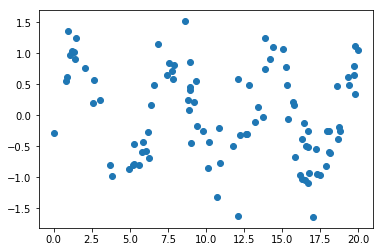

<class 'numpy.ndarray'>


In [159]:
#generate some data in the form of a sine wave with noise around the line so it is a wobbly somewhat predictable line.
xy_coordinates = my_sin_rvs(100)

#Now plot the data to see what it looks like. 
plt.scatter(xy_coordinates[0], xy_coordinates[1])
plt.show()
print(type(xy_coordinates[0]))

In [160]:
# combine the 2 np arrays of x and y coordinates into a list of tuples, so we can sort them later,
# and keep the associated y value in tact.
xy_coordinates_tuples = list(zip(xy_coordinates[0], xy_coordinates[1]))

## Write my own KNN simple regression function

In [182]:
# KNN regression function 
# parameters to adjust is k_nearest and number of grid positions ie. 
# new points along the x axis I want to plot 
# or predict (once we go beyond the scale of the sine wave it becomes prediction)
# since my sine wave scale is 20, we will run this with the same data twice first at 20 
# then 25 to predict 5 points into the future. Will it follow the sine wave patter or do something else?
# what happens as we adjust K?

k_nearest= 3

new_xy_points = []

for x_grid_position in range(23):
    #sort the list using sorted and lambda using the x_grid position
    # make sure the 2 lists are zipped into a list of tuples so that the list can be sorted
    # by the first element of each tuple. 
    # Otherwise if we just past a list of 2 lists, the sorted(lambda function will fail)
    # see the following for info: https://wiki.python.org/moin/HowTo/Sorting
    
    # this will give us a sorted list in order of the closest items.
    # we can then grab the top 3 or chosen k-nearest neighbors and do an average of the y's to find the y element. 

    temp_knn_sorted = np.array(sorted(xy_coordinates_tuples, key=lambda x: abs(x[0] - x_grid_position)))

    new_xy_points.append([x_grid_position, sum(temp_knn_sorted[:k_nearest,1])/k_nearest])
new_xy_points = np.array(new_xy_points)

In [183]:
print(len(new_xy_points))
print(len(temp_knn_sorted))

23
100


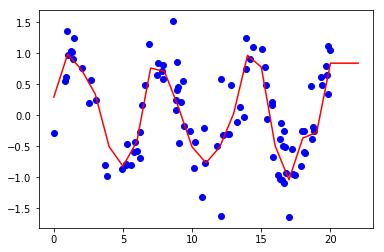

In [184]:
plt.scatter(xy_coordinates[0], xy_coordinates[1], color='b')
plt.plot(new_xy_points[:,0], new_xy_points[:,1], color='r')

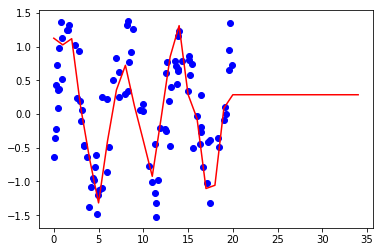

In [154]:
plt.scatter(first_x_set, first_y_set, color='b')
_=plt.plot(new_xy_points[:,0], new_xy_points[:,1], color='r')

- Regularize
    - cripples/BIAS - if yes ->Democracy if less no bias then -> the select.
        - Bias when true:
            - reproducability
            - consistent model fit
            - looks same under hypothetical data sets. 
            - example is above using k of 50 the line will hold fairly true if I regenerate the data again and overlay it to the red line. 
                - k with 1 would have so much variance, it would not map well to a new data set. 
    - force towards some "center" of the data

- examining the bias/variance of the state of the model.
    - is called examining "model complexity"
    - more complex models means -> high variance
    - less complex models means -> high bias
    
- complex models respond to the select (select - meaning only 1 or a few), not the majority vote

- parametric models
    - learn trends/structure. 
    - assuming a class of structures, for example lines that can represent certain sets of relationships
        - this is a parametric model.
    - knn is not a parametric model. and, it is similar to a kde line. 

- KNN is a non-parametric model
    - new data points are only associated to existing data (neighbors) so it does not learn any structure.  

- Intrinsic Error:
    - solution is more data or simpler model.
    - no way to solve by changing parameters.
    - This happens when there is a large amount of variance in the data that each time the model is run there is a new picture drawn. there is a lot of noise in the sample. hard to model a complex model. 
    - complex models chase, intrinsic errors. This is overfitting. 

- residual error is a measure of intrinsic error
    - conflates actual intrinsic error with model based mistakes (error)
    
    
- lauren's method of producing data was predictive, and mine was generative.
    - the generative method uses a type of naive bayes to produce the data. 
        - it says the Pr(x input | y outcomes) 
    - where as the predictive method says Pr( y outcomes | x input) 
    - There is a fuzzy line between the 2 because in a way we are predicting some data based on input. 
        - also, given data we are able to apply the formula to go in either direction to get the inputs or vice versa. 
        
- Also talked about stochastic processes to generate the data. 
    - look up and define term. 

- Distance based methods don't know what to do with categorical data. 
- We found 2 pitfalls of KNN. 1, is it doesn't know what to do with categorical data. 2. it does not do well with predicting into the future. 
    - example is what to do when we add gender to a model of people who chew gum yes/no and smoke yes/no. how do we add the 3rd dimensional category such as male/female.
    - Another option is if we have several features of continuos data and onle 1 category, we can try multiple spreads of the categories say 0 or 1, 0 or 1000  or  0 10000000. Then we can see which model will predict best and choose that one. 
    
- part of the specifications I give the model is the data. It's about how do i use the data and the importance of the data. For example smoking. do I assign smokers and non smokers 0/1 or 0/100000? How i use that data in the model changes the outcome of the model. 
    -  a subtle point here is the method the model uses to predict the outcome, ueclidian remains the same but what changes the outcome is how data is encoded. 

- Your model is your choice of data. 
    - or a BIG part of your model IS your data choice!!!
- The data changes the way the model operates. 
- model is from knn algorithm with my data encoded like this xyz. 
    
    


## Part 2 KNN Classification:

- Create a dataset with 2 or 3 data classes
- cluster the datasets, so they are genarally grouped around each other. 
- label the datapoints A, B, C, etc. 
- work through grid vertically and horizontally, and label each point in the grid lowercase letter corresponding to the knn of the picked k. 

#### Extra credit, draw lines
- separate the groupings with lines


In [185]:
def my_AB_XY_data_builder(size = 50):
    A_x_coordinates = stats.binom.rvs(loc=1, n=50, p=.6,size=size)
    A_y_coordinates = stats.binom.rvs(n=60, p=.7, size =size)
    B_x_coordinates = stats.binom.rvs(n=100, p=.25,size=size)
    B_y_coordinates = stats.binom.rvs(n=60, p=.7, size =size)
    ab_df = pd.DataFrame()

    ## next line I want to figure out how to create the columns and pass the data in one line. 
    ## vs. one at a time shown afterwards. 
    #     ab_df['A_x_coordinates', 'A_y_coordinates', 'outcome']= [A_x_coordinates, A_y_coordinates, [0]*len(A_x_coordinates)]
    ab_df['A_x_coordinates']= A_x_coordinates 
    ab_df['A_y_coordinates'] = A_y_coordinates
    ab_df['outcome'] = [0]*len(A_x_coordinates) 

    temp_df = pd.DataFrame()
    temp_df['A_x_coordinates']= B_x_coordinates 
    temp_df['A_y_coordinates'] = B_y_coordinates
    temp_df['outcome'] = [1]*len(B_x_coordinates) 

    ab_df = pd.concat([ab_df, temp_df], ignore_index = True)  
#     ab_df['A_y_coordinates'] = A_y_coordinates
#     ab_df['outcome'] = [0]*len(A_x_coordinates) 
#     print(ab_df)
    return (ab_df)

In [203]:
## go get data for classification
df = my_AB_XY_data_builder()
df.head()


,A_x_coordinates,A_y_coordinates,outcome
0,31,42,0
1,35,43,0
2,34,42,0
3,28,44,0
4,32,39,0


In [205]:
# 0 will represent red below and 1's are blue.
# the data is mixed to make KNN more challenging. 
A_xy_coord = np.array(list(zip(df.loc[df.outcome == 0, 'A_x_coordinates'], \
                               df.loc[df.outcome == 0, 'A_y_coordinates'])))
B_xy_coord = np.array(list(zip(df.loc[df.outcome == 1, 'A_x_coordinates'], \
                               df.loc[df.outcome == 1, 'A_y_coordinates'])))

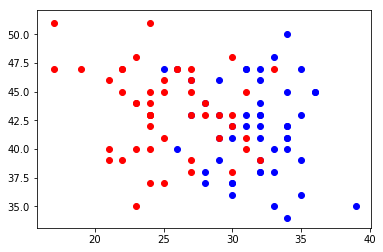

In [206]:
_=plt.scatter(A_xy_coord[:,0],A_xy_coord[:,1] , color='b')
_=plt.scatter(B_xy_coord[:,0], B_xy_coord[:,1], color='r')

## Write my own Euclidian distance function for KNN
### generalizable function. 
The function is hard coded to work with only 2 features, and to generalize it for future use I would modify it so it could calculate n number of features without changing the code. Probably a for loop or np.array's.

In [231]:
# write my own euclidian distance function. 
# make a generalizable L2-norm function
def my_L2_Norm(test_xy_coord, labeled_xy_coord):
    temp_coord = test_xy_coord - labeled_xy_coord[0:2]
    return (np.sqrt(temp_coord[0]**2 + temp_coord[1]**2))

In [232]:
#test the L2 norm function
temp1 = A_xy_coord[0]
temp2 = B_xy_coord[0]
print(temp1, temp2)
my_L2_Norm(temp1, temp2)


[31 42] [21 39]


10.440306508910551

In [228]:
# first add a color parameter to each element of the list. 
# not the most efficient as it takes up so much space for one data point. 
# with more time I would do something more dynamic such as creating a list
# the list would contain the name of the list, and the color associated.
# the list would be iterated through to capture each of the color points without assigning
# them to an element in the array.

A_xy_coord_with_color = np.insert(A_xy_coord, 2, 1, axis=1).copy()
B_xy_coord_with_color = np.insert(B_xy_coord, 2, 2, axis=1).copy()
full_xy_coords_with_color = np.concatenate((A_xy_coord_with_color, B_xy_coord_with_color))

# create the range to iterate through for each grid point. This should be automated later
# based on the range of data points from A and B array's.
x_axis_range = range(10, 40)
y_axis_range = range(25, 55)



In [244]:
def get_point_color(sorted_list, k_neighbors):
    tempList = sorted_list[0:k_neighbors]
    color_counts = Counter(tempList[:,2])
    
    ## Here's how the function below works.
    # pass in the color keys, currently 1 and 2, but more could be added without changes to function
    # iterate through the counter for each key (k), look up the corresponding value (the counts), 
    # and take the maximum of those values. 
    key_max = max(color_counts.keys(), key=(lambda k: color_counts[k]))
    if key_max == 1:
        return 'blue'
    else:
        return 'red'

In [245]:
# testing andf showing how the max function works from the get_point_color function above.
# chaning the counts of the value you can see the output works correctly

# Test 1 
color_counts = {2: 1, 1: 4}
print(color_counts.keys())
print("winner is: ", max(color_counts.keys(), key=(lambda k: color_counts[k])))

# Test 1 
color_counts = {2: 4, 1: 1}
print(color_counts.keys())
print("winner is: ", max(color_counts.keys(), key=(lambda k: color_counts[k])))

dict_keys([2, 1])
winner is:  1
dict_keys([2, 1])
winner is:  2


In [246]:
# select k_neighbors
k_neighbors = 5

grid_fill_xy = []

#iterate through each grid (x, y) data point. 
for x_axis in x_axis_range:
    for y_axis in y_axis_range:
        temp_xy = (x_axis, y_axis)
        temp_my_knn_sorted = np.array(sorted(full_xy_coords_with_color,key=lambda x: my_L2_Norm(temp_xy, x)))
        new_color = get_point_color(temp_my_knn_sorted, k_neighbors)
        grid_fill_xy.append([temp_xy, new_color])
        

In [247]:
# need to index into the tuples, but I was unable to 
# return the entire column of zeroth element of the tuple
# so, instead I created a dataframe. the reason for the DF is to keep all row elements related.
# a better alternative is to dump the data directly into a dataframe from the beginning.
# 2nd option is a list comprehension to break out each element into its own list/array
grid_fill_df = pd.DataFrame(grid_fill_xy)
grid_fill_df.rename(columns={0:'tuple_xy',1:'color'}, inplace=True)
grid_fill_df['grid_x'], grid_fill_df['grid_y'] = zip(*grid_fill_df.tuple_xy)
# grid_fill_df['grid_x'], grid_fill_df['grid_y'] =grid_fill_df.tuple_xy
# grid_fill_df.head()
grid_fill_df['color'] = grid_fill_df.color.astype(str, inplace=True)
grid_fill_df.head()
color_array = list(grid_fill_df['color'])

grid_x_list = [x[0][0] for x in grid_fill_xy]
grid_y_list = [x[0][1] for x in grid_fill_xy]
grid_c_list = [x[1] for x in grid_fill_xy]

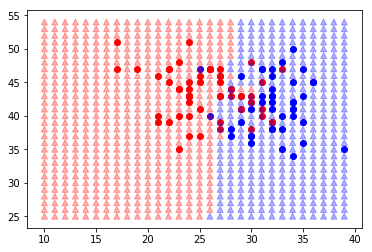

In [248]:
## graph the results:
_=plt.scatter(A_xy_coord[:,0],A_xy_coord[:,1] , color='b')
_=plt.scatter(B_xy_coord[:,0], B_xy_coord[:,1], color='r')
# for key, val in enumerate(grid_x_list):
#     _=plt.plot(grid_x_list[key], grid_y_list[key], marker='^', c=grid_c_list[key], linewidth=0, alpha=.3100)

# _=plt.plot(grid_fill_df['grid_x'], grid_fill_df['grid_y'], marker='^', c=grid_fill_df['color'], linewidth=0, alpha=.3100)

_=plt.scatter(grid_x_list, grid_y_list, marker='^', color=grid_c_list, alpha=.3100)

### Challenges from exercise:
- Slicing into a list that looked like this [[(13,4),'red']] where it was a list containing a list containing a tuple. 
    - I was unable to access all values in the tuple and pass as a list to the plot function. 
    - as a work around I wound up using list comprehensions to extraxt into 3 separate lists.
    - I tried using pandas, because I like having all of the data associated in a row
        - Passing the color to plot color parameter was challenging, and was erroring out.
        - Hence the reason I moved to list comprehensions. 
    - To access the list, I found out that np.array's can accept [:,3] notation, but lists do not. 
        - lists accept [][] notation.
        - in both cases I was unable to get to the 3rd level either because I got a too many slices issue with the np.array or could not return the entire row using lists. 
        
- Passing color to the plot and scatter plot methods in pyplot.
    - For some time I was getting errors passing a list of colors to the methods
    - I could set the color to 1 value, but was unable to pass a list of colors. 
    - eventually I figured out when passing a list, it would not accept the abbreviated color name like 'r', or 'b', but it would only accept the full string name 'red', and 'blue'

- The support and of classmates and instructor we worked through a couple of these together. 

## Exercise 3: 
## Exercise/Practice 

### 1. use scikit-learn.knn to fit model and split data. 
- with my data pipeline from yesterday morning. 
    - create a function to calculate MSE
    - Score the model with all of the data. Save that data point.
    - Remove a single data point.
        - recalculate MSE and save.
        - recalculate MSE for the single data point. 
        - repeate for all data points.
    - split the data 70/30
        - perform MSE on the 70 train.
        - perform MSE on 30 test validation data.
        
See Jupyter KNN notebook for code. Under Exercise 3 

In [251]:
#MSE function
def my_MSE(y_test_vec, y_pred_vec):
    '''Calculate MSE between the actual test vector outcome and the predicted outcome vectors. '''
    epsilon_hat = y_test_vec - y_pred_vec
    return epsilon_hat.dot(epsilon_hat)/len(y_test_vec)

In [216]:
#RMSE function
def my_RMSE(y_test_vec, y_pred_vec):
    '''Calculate MSE between the actual test vector outcome and the predicted outcome vectors. '''
    epsilon_hat = y_test_vec - y_pred_vec
    return np.sqrt(epsilon_hat.dot(epsilon_hat)/len(y_test_vec))

In [217]:
# K-Nearest Neighbors (K-NN)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

number_of_samples = 1000

def my_data_prep(number_of_samples = 1000):
    # Importing the dataset
    # depracation error passing 1d arrays to .fit() is depracated. ran the following to eliminate

    #    xy_coordinates = generate_my_simple_xy_coordinates(my_norm_rvs(number_of_samples))
#     x_data = xy_coordinates[:,0].reshape(-1,1)
#     y_data = xy_coordinates[:,1].reshape(-1,1).ravel()

    tempx, tempy = my_sin_rvs(number_of_samples)
    x_data = tempx.reshape(-1,1)
    y_data = tempy.reshape(-1,1).ravel()
    # x_data = x_data.reshape(-1,1)
    # y_data = y_data.reshape(-1,1).ravel()

    ####******* Danger.... Running the code above alone returns 
    ##### floats for the y values called 'continuous'
    ##### Since this is a classifier, it is looking for integers, 
    ##### so we need to convert the values. 
    #### ValueError: Unknown label type: 'continuous'    
#     from sklearn import preprocessing
#     from sklearn import utils
#     lab_enc = preprocessing.LabelEncoder()
#     encoded = lab_enc.fit_transform(y_data)
#     print(encoded)
    
    
    #for now using X and y to stick with code from example
    X = x_data
    y = y_data

#     _ = plt.scatter(X, y, color='r', alpha=.3)
    return(X,y)




In [218]:
X, y = my_data_prep(100)
# _ = plt.scatter(X, y, color='r', alpha=.3)

In [219]:
# plot_my_data(x_support, mse_list)
import matplotlib.pyplot as plt
%matplotlib inline 


# KNN Regression Example Next
## Calculates the predicted location of where the outcome should be given continuous data points. 
### Based on euculidian distance.
### This is a regression problem:
    #### So, Does not try to classify the data as red/green.
    #### Goal is estimate where the algorithm predicts the data should land. 

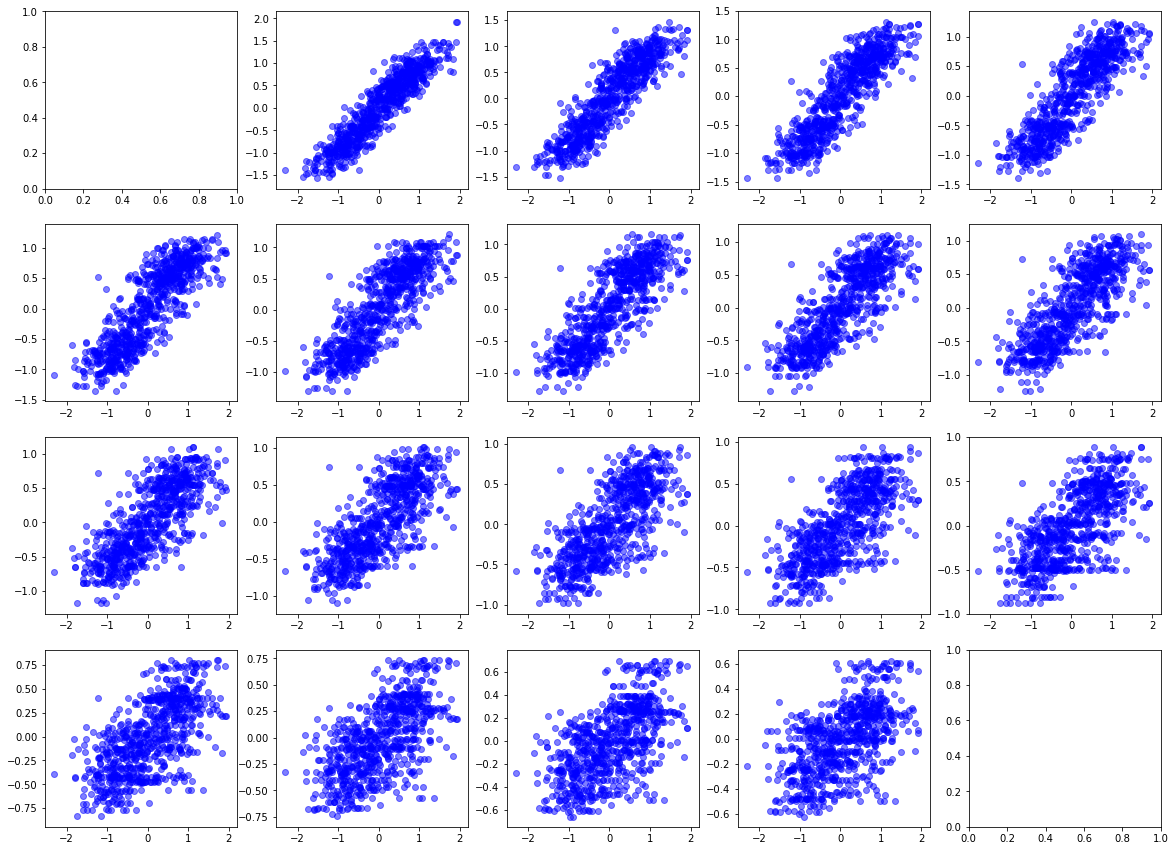

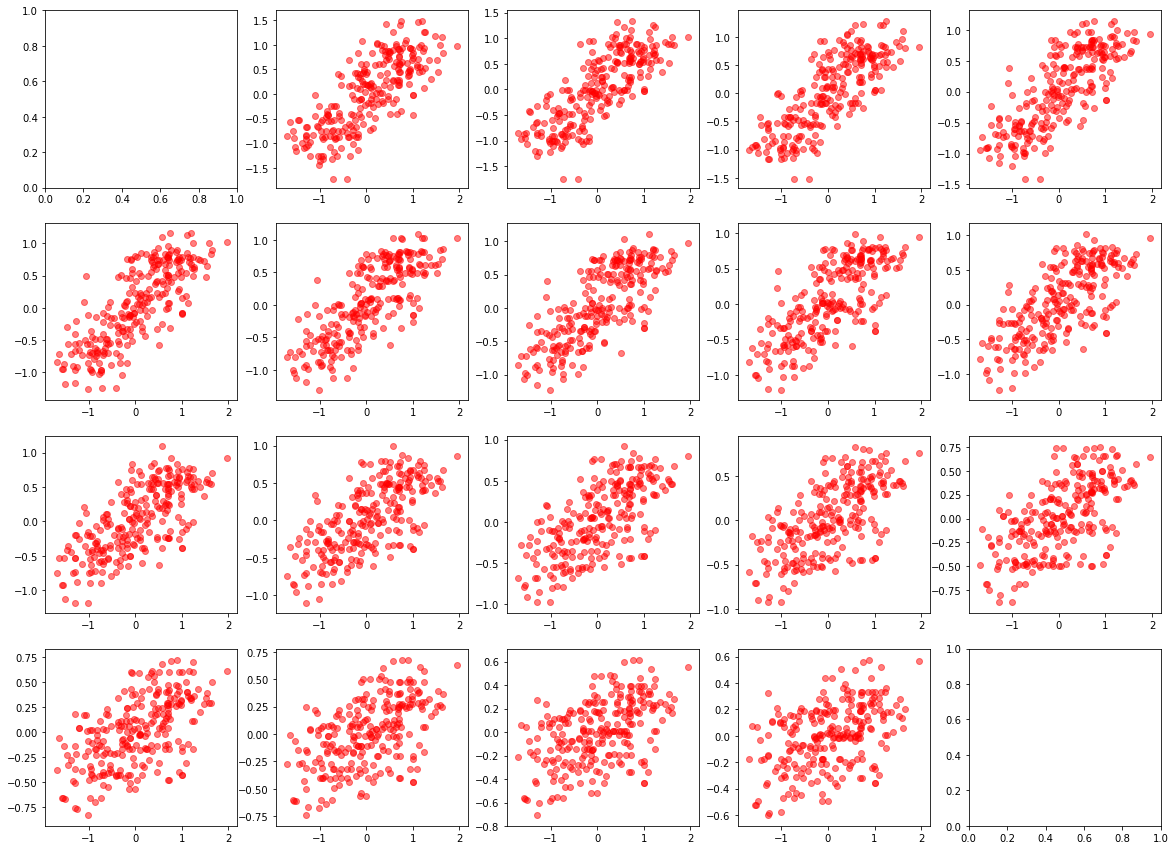

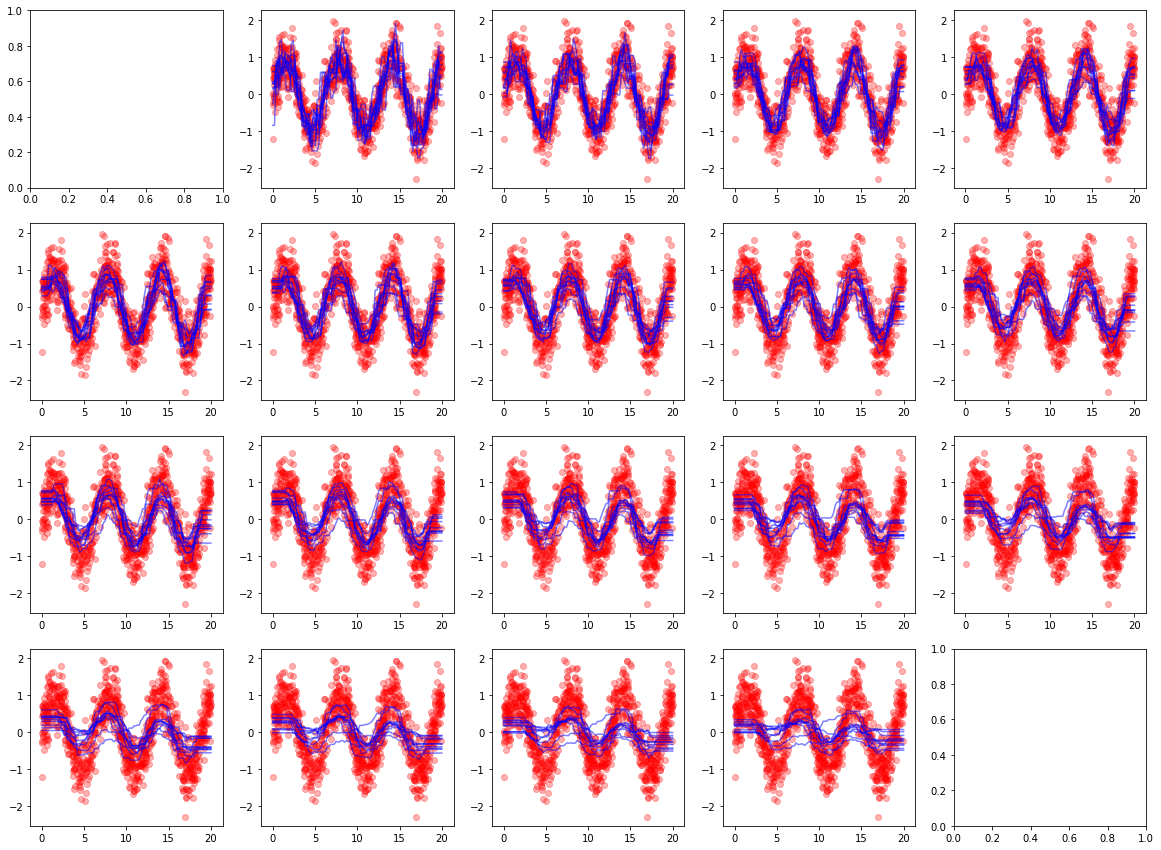

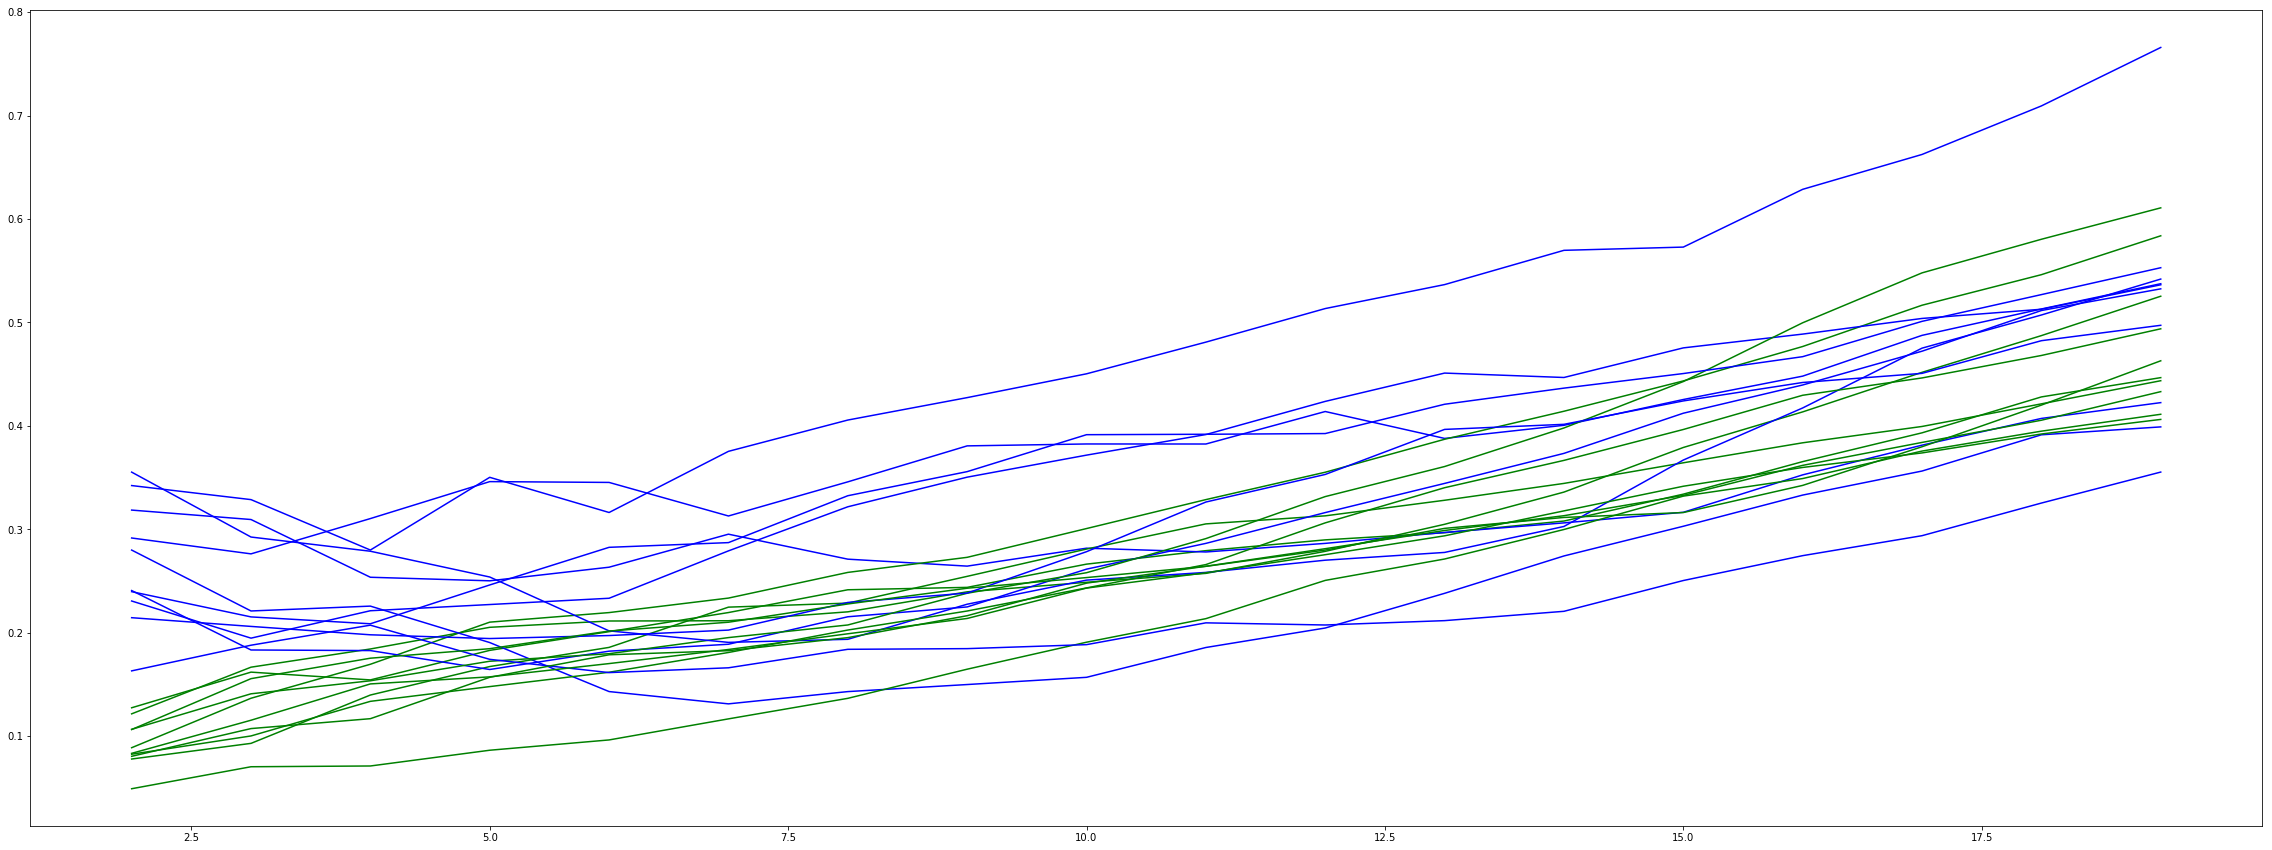

In [255]:
# run (repeat_tests=n) times and overlay the MSE graphs for different data sets. 
##  but using the same number of samples and range of k
repeat_tests = 10
fig, ax = plt.subplots(4,5 , figsize=(20,15)) # or max subplots = repeat_tests
# fig = plt.figure(figsize=(40,10))
fig2, ax2 = plt.subplots(4,5 , figsize=(20,15))
fig3, ax3 = plt.subplots(4,5 , figsize=(20,15))
fig4, ax4 = plt.subplots(1,1, figsize=(40,15))

for test_number in range(repeat_tests):

    X, y = my_data_prep(100)

    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


    # Standardize the data. Since we are working with one feature, I will skip at this time. 


    # $$$$$$$$$$$$ -----  Modify to see entire data set fit and predicted on.
    # hack: reassigning variables for easy switch back to MSE calc. process. 
#     X_train = X
#     X_test = np.linspace(0,math.ceil(X_train.max()),len(X_train)).reshape(-1,1)
#     y_train = y
#     y_test = y
    
    
    # Fitting K-NN to the Training set
    from sklearn.neighbors import KNeighborsRegressor

    
    # Exercise 1. : using the same split of data, vary the number of k-nn. Each time, recalculate the
    # MSE for each change in k for the test data.
    # plot the line of MSE changes where k is on the x-axis starting from 2 to 25.
    maximum_neighbors = 20
    mse_list_insample = []
    mse_list_out_of_sample = []
    plot_row_num = 0
    plot_col_num = 1
    
    for k_neighbors in range(2,maximum_neighbors):
        # Fitting K-NN to the Training set
        regressor = KNeighborsRegressor(n_neighbors = k_neighbors, metric = 'minkowski', p = 2)
        regressor.fit(X_train, y_train)

        # Predicting the Test set results
        y_pred = regressor.predict(X_test)
        y_pred_from_train = regressor.predict(X_train)
        
        linspc = np.linspace(0, math.ceil(X.max()),len(X)).reshape(-1,1)
        y_pred_from_linspace = regressor.predict(linspc)
        
        
        # Calculate the MSE 
        mse_list_out_of_sample.append(my_MSE(y_test, y_pred))
        mse_list_insample.append(my_MSE(y_train, y_pred_from_train))

#         plt.subplot(131)

        _ = ax3[plot_row_num][plot_col_num].scatter(X, y, color='r', alpha=.3)
        _ = ax3[plot_row_num][plot_col_num].plot(linspc, y_pred_from_linspace, color='b', alpha=.5)
#         plt.subplot(231)
#     _ = ax[test_number].plot(range(2,maximum_neighbors), mse_list)
#     _ = plt.plot(range(2,maximum_neighbors), mse_list)
#     _ = ax[1].scatter(X, y, color='r', alpha=.3)
#     _ = ax[1].scatter(X_test, y_test, color='g', alpha=.3)
#     _ = ax[1].scatter(X_test, y_pred, color='b')

        _ = ax[plot_row_num][plot_col_num].scatter(y_train, y_pred_from_train, color='b', alpha=.5)
        _ = ax2[plot_row_num][plot_col_num].scatter(y_test, y_pred, color='r', alpha=.5)

        if k_neighbors %5==0: 
            plot_row_num +=1
            plot_col_num = 0
        else:
            plot_col_num += 1
    

    _= ax4.plot(range(2,maximum_neighbors), mse_list_insample, color='g')
    _= ax4.plot(range(2,maximum_neighbors), mse_list_out_of_sample, color='b')


# Next Exercise will use the classification data
## Will predict whether a new data point should be red/green. rather than where it should reside. 

/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


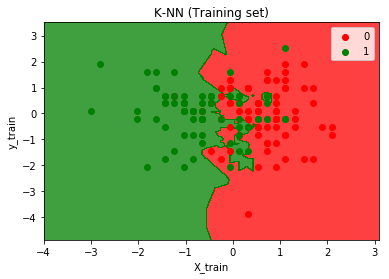

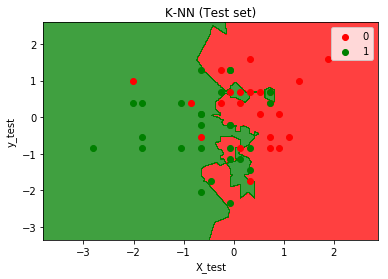

In [573]:
# K-Nearest Neighbors (K-NN)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = my_AB_XY_data_builder(100)
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()


# Template ------ K-Nearest Neighbors (K-NN) ------  TEMPLATE
## The following template uses 2 features as input to X and one outcome
### The next code box is also a template. 

### Importing the libraries
- import numpy as np
- import matplotlib.pyplot as plt
- import pandas as pd

### Importing the dataset
- dataset = pd.read_csv('Social_Network_Ads.csv')
- X = dataset.iloc[:, [2, 3]].values
- y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set
- from sklearn.model_selection import train_test_split
- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling
- from sklearn.preprocessing import StandardScaler
- sc = StandardScaler()
- X_train = sc.fit_transform(X_train)
- X_test = sc.transform(X_test)

### Fitting K-NN to the Training set
- from sklearn.neighbors import KNeighborsClassifier
- classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
- classifier.fit(X_train, y_train)

### Predicting the Test set results
- y_pred = classifier.predict(X_test)

### Making the Confusion Matrix
- from sklearn.metrics import confusion_matrix
- cm = confusion_matrix(y_test, y_pred)

### Visualising the Training set results
- from matplotlib.colors import ListedColormap
- X_set, y_set = X_train, y_train
- X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
-                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
- plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
-              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
- plt.xlim(X1.min(), X1.max())
- plt.ylim(X2.min(), X2.max())
- for i, j in enumerate(np.unique(y_set)):
-     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
-                 c = ListedColormap(('red', 'green'))(i), label = j)
- plt.title('K-NN (Training set)')
- plt.xlabel('Age')
- plt.ylabel('Estimated Salary')
- plt.legend()
- plt.show()

### Visualising the Test set results
- from matplotlib.colors import ListedColormap
- X_set, y_set = X_test, y_test
- X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
-                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
- plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
-              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
- plt.xlim(X1.min(), X1.max())
- plt.ylim(X2.min(), X2.max())
- for i, j in enumerate(np.unique(y_set)):
-     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
-                 c = ListedColormap(('red', 'green'))(i), label = j)
- plt.title('K-NN (Test set)')
- plt.xlabel('Age')
- plt.ylabel('Estimated Salary')
- plt.legend()
- plt.show()

In [ ]:
# K-Nearest Neighbors (K-NN)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
